# Multivariate probability generating functions

While one can go a long way with univariate generating functions, it is limited to characterize a single random variable---or the sum of multiple *independent* random variables---, but to characterize $m$ random variables $(n_1, n_2, \dots, n_m)$ that are not necessarily independent, we need to consider multivariate probability generating functions of the form

$$
\begin{align}
G(x_1,x_2,\dots,x_m) = \sum_{n_1 = 0}^\infty \cdots \sum_{n_m = 0}^\infty p_{n_1,n_2,\dots,n_m} x_1^{n_1}x_2^{n_2} \cdots x_m^{n_m} \;,
\end{align}
$$

where $p_{n_1,n_2,\dots,n_m}$ is the joint probability distribution.

Fortunately, all the properties we discussed previously and the numerical inversion can still be applied.

## Throwing dice of different colors

Let's assume we throw three fair dice. Two of the three are blue and one is red. We calculate two sums ($n_1$ and $n_2$) by adding the number on top of the blue die with the two number on top of the red dice independently. What is the PGF for $p_{n_1,n_2}$? It is

$$
\begin{align}
G(x_1,x_2) = g(x_1) g(x_2)g(x_1x_2) \;.
\end{align}
$$

Indeed, if $k_1$ and $k_2$ are the number on top of the red dice, and $k_3$ is the result on top of the blue die,

$$
\begin{align}
G(x_1,x_2) &= \sum_{n_1=0}^{12} \sum_{n_2=0}^{12} p_{n_1,n_2} x_1^{n_1} x_2^{n_2} \;, \\
           &= \sum_{k_1=0}^{6} \sum_{k_2=0}^{6} \sum_{k_3=0}^{6} p_{k_1} p_{k_2} p_{k_3} x_1^{k_1 + k_3} x_2^{k_2 + k_3} \;, \\
           &= \sum_{k_1=0}^{6} p_{k_1} x^{k_1} \sum_{k_2=0}^{6}  p_{k_2} x^{k_2} \sum_{k_3=0}^{6} p_{k_3} (x_1x_2)^{k_3} \;, \\
           &= g(x_1) g(x_2)g(x_1x_2) \;,
\end{align}
$$

So, despite the fact that $n_1$ and $n_2$ are not independent, we can still use the independence of the underlying dice throw ($k_1$,$k_2$, and $k_3$) to construct the joint PGF by the multiplication of the PGFs representing the independent random variables.

## Numerical inversion of multivariate PGFs

Similarly to the univariate case, the joint distribution $p_{n_1,n_2}$ is recovered from the multivariate PGF $G(x_1,x_2)$ using a discrete Fourier transform

$$
\begin{align}
p_{n_1,n_2} = \frac{1}{N_1 N_2 r_1^{n_1} r_2^{n_2} } \sum_{m_1 = 0}^{N_1-1} \sum_{m_2 = 0}^{N_2-1} G\left(r_1 e^{2 \pi i m_1 /N_1}, r_2 e^{2 \pi i m_2 /N_2} \right) e^{2 \pi i  n_1 m_1 /N_1}e^{2 \pi in_2  m_2 /N_2 } \;.
\end{align}
$$

Again, $r_1$ and $r_2$ are the radii of the contour of integration in both dimensions and should be chosen wisely to limit the effect of aliasing if $N_1$ and $N_2$ are too small.

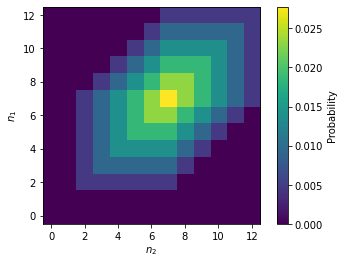

In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = lambda x: np.sum([x**n/6 for n in range(1,7)])
G = lambda x1,x2: g(x1)*g(x2)*g(x1*x2)
G = np.vectorize(G)
N1 = 13
N2 = 13
n1 = np.arange(N1)
n2 = np.arange(N2)
c1 = np.exp(2*np.pi*1j*n1/N1)
c2 = np.exp(2*np.pi*1j*n2/N2)
C1, C2 = np.meshgrid(c1, c2) #get 2d array versions
pn1n2 = abs(np.fft.fft2(G(C1,C2))/(N1*N2))
plt.imshow(pn1n2, origin='lower')
plt.colorbar(label='Probability')
plt.ylabel(r'$n_1$')
plt.xlabel(r'$n_2$')
plt.show()

Try playing with both the dimensions ($N_1,N_2$) and the radii ($r_1,r_3$) to see the impact.